# 18.C21 Problem Set 2 Solutions

## Problem 1 (4+4+4+4 points)

See also [FNC book section 1.2](https://fncbook.com/conditioning/).  

**(a)** Compute the absolute and relative condition numbers of $f(x) = x^p$ for arbitrary real powers $p$.  Which one of them diverges for $p < 1$, and why?

**(b)** Suppose that $h(x) = f(g(x))$, for differentiable functions $f$ and $g$ mapping real $\mapsto$ real.  Show that the relative condition number $\kappa_r(h, x)$ of $h$ at $x$ is a product of the relative condition numbers of $f$ and $g$: 
$$
\kappa_r(h, x) = \kappa_r(f, g(x)) \kappa_r(g, x)
$$

**(c)** Find the relative condition number of $h(x) = \sqrt{x+1}$ (for $x \ge -1$).  Compare it to the result of the formula from (b) for $f(y) = \sqrt{y}$ and $g(x) = x + 1$.  Around where might you expect a 1% error in $x$ to lead to a large relative error in $h(x)$?  Where might a 1% error in $x$ lead to a much smaller relative error in $h(x)$?

**(d)** Compute and compare the relative condition numbers of $g(x) = \sqrt{x+1}$ (from the previous part), $f(y) = y - 1$, and $h(x) = f(g(x)) = \sqrt{x+1} - 1$.  How do these relate to your results from problem 2 of pset 1?

### Solution:

**(a)** This is a scalar function, so we can use the simple formula in terms of the derivative from class.  The absolute condition number is:
$$
\kappa_a(f, x) = |f'(x)| = \boxed{|p x^{p-1}|}
$$
and the relative condition number is
$$
\kappa_r(f, x) = \kappa_a(f, x) \, |x|/|f(x)| = \boxed{|p|} \, .
$$
The absolute condition number diverges as $x \to 0^+$ for $p < 1$.  For $0 < p < 1$, even though $f(x) \to 0$, the slope diverges.  For $p < 0$, both the function and its slope diverge.  This makes the value of $f(x)$ very sensitive to small changes in $x$.

However, the *relative* condition number is fixed independent of $x$, even for $p < 1$!  This is because $|f(x)/x|$ diverges at the *same rate* as the slope for any power law $p$, so the *fractional* change in $f(x)$ relative to the *fractional* change in $x$ does not diverge.

(e.g. even if for $p < 0$ the diverging $f(x)$ changes by a large amound for a small $\delta x$, the relative error is small because it is compared the diverging $f(x)$.)

**(b)** This is just an application of the chain rule from first-year calculus:
$$
h'(x) = f'(g(x)) g'(x) \, ,
$$
so when we plug this into the formula for the relative condition number, we get:
\begin{align}
\kappa_r(h, x) &= \frac{|h'(x)|}{|h(x)|/|x|} = \frac{|f'(g(x))|}{|f(g(x))|} \frac{|g'(x)|}{1/|x|} \\
&= \underbrace{\frac{|f'(g(x))|}{|f(g(x))|/|g(x)|}}_{\kappa_r(f, g(x))} \underbrace{\frac{|g'(x)|}{|g(x)|/|x|}}_{\kappa_r(g, x)} \, ,
\end{align}
where in the last step we multiplied and divided by $|g(x)|$.

**(c)** Applying the formula to $h(x) = \sqrt{x+1}$ gives:
$$
\kappa_r(h, x) = \frac{|h'(x)|}{|h(x)|/|x|} = \frac{1}{2\sqrt{x+1}} \frac{|x|}{\sqrt{x+1}} = \boxed{\frac{|x|}{2|x+1|}} \, .
$$
If we compute the condition numbers of $f(y) = \sqrt{y}$ and $g(x) = x + 1$, we get:
$$
\kappa_r(f, y) = 1/2 \text{   and   } \kappa_r(g, y) = \frac{|x|}{|x+1|} \ , ,
$$
whose product clearly gives $\kappa_r(h, x)$ as expected.

The relative condition number diverges as $x \to -1^+$, so a small relative error in $x$ will give a large error in $h$ for $x$ **near –1**.  (For example, if $x = -0.98$, multiplying $x$ by 1.01 changes $h(x)$ by about 29%.)

On the other hand, the condition number goes to zero as $x \to 0$, because in this regime $h \approx 1$ regardless of how small $x$ is, so in the regime **|x| ≪ 1** regime a small *relative* error in $x$ will give a much smaller relative error in $h$.   (For example, if $x = 10^{-3}$, multiplying $x$ by 1.01 changes $h(x)$ by about 0.0005%.)

**(d)** From part (c), $\kappa_r(g, x) = |x|/|x+1|$, and by inspection the condition number of $f(y) = y - 1$ is $\kappa_r(f, y) = |y|/|y-1|$.  The condition number of $h(x) = f(g(x)) = \sqrt{x+1} - 1$ is therefore
$$
\kappa_r(h, x) = \kappa_r(f, g(x)) \kappa_r(g, x) = \frac{\sqrt{x+1}}{|\sqrt{x+1} - 1|} \frac{|x|}{|x+1|} = \boxed{\frac{1}{|\sqrt{x+1} - 1|} \frac{|x|}{\sqrt{x+1}}} \, .
$$

From problem 2 of pset 1, we founct that computing $h(x) = f(g(x)) = \sqrt{x+1} - 1$ could be accurate for $|x| \ll 1$, but only if we computed it carefully — a naive application of the formula, by computing first $g(x)$ and then $f(x)$, gave a large error.

The problem with the naive calculation is that the **condition number of f diverges** as $y \to 1$, which happens for $y = g(x)$ when $x \to 0$.   So, we have problems if we **compute f explicity**.

However, we can do better if we rearrange the formula for $h(x)$ to a different formula that does not involve the $f(y) = y-1$ cancellation at $y \approx 1$.   Why?  Because **h(x) is well-conditioned at x ≈ 0!**  Let's calculate it explicitly, computing:
$$
\lim_{x \to 0} \kappa_r(h, x) = \boxed{2}\, .
$$
This can be done by L'Hopital's rule, since $\kappa_r(f, g(x)) \to \infty$ and $\kappa_r(g, x) \to 0$.  Or we can do it by re-arranging the formula for $\kappa_r(h, x)$ by multiplying and dividing by $\sqrt{x+1} + 1$ (similar to the trick in pset 1):
$$
\kappa_r(h, x) = \frac{1}{|\sqrt{x+1} - 1|} \frac{\sqrt{x+1} + 1}{\sqrt{x+1} + 1}  \frac{|x|}{\sqrt{x+1}} = \frac{\sqrt{x+1} + 1}{|x|} \frac{|x|}{\sqrt{x+1}} = \boxed{\frac{\sqrt{x+1} + 1}{\sqrt{x+1}}}
$$
which clearly $\to 2$ as $x \to 0$.

So, since $h(x)$ itself is well-conditioned at $|x| \ll 1$ even though $f(y)$ is ill-conditioned, it should be possible to compute $h(x)$ accurately by rearranging the calculation to avoid the intermediate step of $f(y) = y - 1$, and this is exactly what we did in pset 1!

## Problem 2 (5+10+5 points)

(From the FNC book [exercise 9.3.6](https://fncbook.com/stability-1/).)

To interpolate functions defined on the entire real line, one can use the change of variables
$$
z = \phi(x) = \frac{2x}{1-x^2} \, ,
$$
which maps the interval $x \in (-1,1)$ in one-to-one fashion to $z$ on the whole real line.

Suppose that $f(z)$ is a function on the whole real line (with finite limiting values as $z \to \pm \infty$).  If we interpolate a degree-$n$ polynomial $p(x)$ through $f(\phi(x))$ through $n+1$ points $x_k$ ($k = 0,\ldots,n$), that defines an interpolating function $q(z) = p(\phi^{-1}(z))$ for all $z \in \mathbb{R}$.

**(a)** As $x$ goes to $-1^+$ and $1^-$ (from the right and left, respectively), $z = \phi(x)$ goes to _________ and __________.   Invert $\phi(x)$ to give a formula for $x = \phi^{-1}(z)$, making sure that $-1 < x < 1$.

**(b)** Let $x_k$ be the $n+1$ Chebyshev points $x_k = \cos(k\pi/n)$.  Use these to interpolate the function $f(z) = (z^2 - 2z + 2)^{-1}$.

* Compute the polynomial interpolant $p(z)$ for $n=15$ — maybe don't do this using the Vandermonde matrix, which is ill-conditioned (though for $n=15$ it's probably okay)!  Instead use a package like [BasicInterpolators.jl](https://github.com/markmbaum/BasicInterpolators.jl) or [FastChebInterp.jl](https://github.com/JuliaMath/FastChebInterp.jl) in Julia which implement accurate Chebyshev interpolation (or a package like [BarycentricInterpolation.jl](https://github.com/dawbarton/BarycentricInterpolation.jl) which does stable polynomial interpolation by the "barycentric" formula), or corresponding library functions like [`numpy.polynomial.chebyshev.chebinterpolate`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.chebinterpolate.html) [`numpy.polynomial.chebyshev.chebval`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.chebval.html) (or [`scipy.interpolate.
barycentric_interpolate`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.barycentric_interpolate.html)) in Python.  Be careful how you evaluate $f(z)$ at `z = ±Inf` ($\pm \infty$).
* Plot the interpolant $q(z) = p(\phi^{-1}(z))$ evaluated at 1000 points $z \in [-6,6]$, with markers at the 31 interpolation points $z_k = \phi(x_k)$, along with the exact $f(z)$.

**(c)** Do the same thing as in part (b), but use $n+1$ equally spaced points $x_k$ for $n=15$, and plot the polynomial interpolant. (Using the Vandermonde matrix is fine: what is the L2 condition number of the Vandermonde matrix in this case, computed with `cond` in Julia or `numpy.linalg.cond` in Python — why shouldn't this be a problem for roundoff errors in `Float64` precision?)

### Solution:

**(a)** By inspection, we have the limits $\phi(-1^+) = -\infty$ and $\phi(1^-) = +\infty$ (the denominator goes to $0^+$ and the numerator goes to $\pm 1$).  We can also check that this is what Julia does numerically:

In [1]:
ϕ(x) = 2x/(1-x^2)

ϕ(+1.0), ϕ(-1.0)

(Inf, -Inf)

Solving for $x$ from $z$ is just a quadratic equation: $z(1 - x^2) = 2x \implies z x^2 + 2x - z = 0$.  Applying the quadratic formula, we find:
$$
x = \frac{-1 \pm \sqrt{1+ z^2}}{z} \, .
$$
Which sign should we choose?  $\sqrt{1 + z^2} > z$, so if we want a value $|x| < 1$ after dividing by $z$ we will need to *add* $-1$:
$$
\boxed{x = \phi^{-1}(z) = \frac{\sqrt{1+ z^2} - 1}{z}} \, .
$$
It is easy to check that this gives $|x| < 1$.  One way is to simplify the expression by multiplying top and bottom by $\sqrt{1+ z^2} + 1$ (similar to pset 1!), giving
$$
\boxed{x = \phi^{-1}(z) = \frac{z}{\sqrt{1+ z^2} + 1}} \,
$$
which is a "nicer" expression because it avoids the cancellation error for $z \approx 0$ (you were not required to do this, however).  Moreover, it obviously gives $|x| < 1$ because $\sqrt{1+ z^2} + 1 > |z|$.

It's also nice to check our expression numerically to see that $\phi^{-1}(\phi(x)) = x$.  (To extra nice numerically, I'll use the [`hypot`](https://stackoverflow.com/questions/63342198/why-does-c-have-a-hypot-function) function to compute $\sqrt{z^2 + 1}$ by `hypot(z,1)`, which avoids overflows for very large $z$, but you're not required to do this.)

In [2]:
ϕ⁻¹(z) = z / (hypot(z,1) + 1)

ϕ⁻¹ (generic function with 1 method)

In [3]:
ϕ⁻¹(ϕ(0.9)), ϕ⁻¹(ϕ(-0.9)) # check!

(0.9, -0.9)

**(b)** We'll use BasicInterpolators.jl as in class to accurately find the polynomial interpolator from Chebyshev points for us for $x \mapsto f(\phi(x))$ (which can be written in Julia as `x -> f(ϕ(x))` or simply as `f ∘ ϕ`, since `∘` is the function-composition operator in Julia).

We'll also be careful that when $z = \pm \infty$ we should set $f(z) = 0$, as otherwise floating-point arithmetic will get confused by $z^2 - 2z$ and get `NaN` from `Inf - Inf` (it doesn't know which infinity is "bigger").

Even for degree $n = 15$, the fit is pretty good, and it rapidly gets much better as we increase the degree.

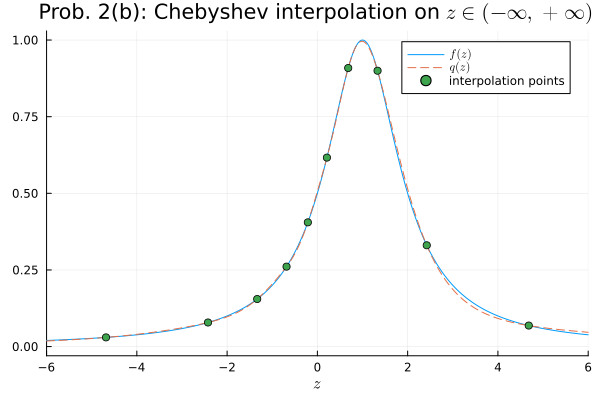

In [4]:
f(z) = isinf(z) ? zero(z) : inv(z^2 - 2z + 2)

using BasicInterpolators
n = 15
p = ChebyshevInterpolator(f ∘ ϕ, -1, 1, n+1)
x = chebygrid(-1, 1, n+1)

using Plots, LaTeXStrings
z = range(-6,6, length=1000)
plot(z, f.(z), label=L"f(z)", xlabel=L"z", title=L"Prob. 2(b): Chebyshev interpolation on $z \in (-\infty, +\infty)$")
plot!(z, p.(ϕ⁻¹.(z)), label=L"q(z)", linestyle=:dash)
scatter!(ϕ.(x), p.(x), label="interpolation points", xlim=(-6,6))

**(c)** With equally spaced points, it is already visibly much worse for $n=15$ (and eventually "goes crazy" if we try to go to large $n$).  The condition number of the Vandermonde matrix is $\boxed{\approx 3 \times 10^6}$, so we are losing about 6 digits, but this is still not so bad in `Float64` precision (but it gets exponentially worse as we increase $n$).

cond(x .^ (0:n)') = 3.280031655510472e6


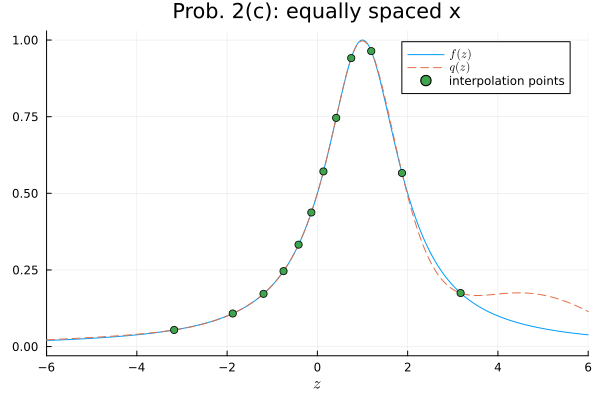

In [5]:
using BasicInterpolators, Polynomials
n = 15
x = range(-1, 1, n+1) # equally spaced points
p = Polynomial(vandermonde(x, f.(ϕ.(x))))

using LinearAlgebra
@show cond(x .^ (0:n)')

using Plots, LaTeXStrings
z = range(-6,6, length=1000)
plot(z, f.(z), label=L"f(z)", xlabel=L"z", title="Prob. 2(c): equally spaced x")
plot!(z, p.(ϕ⁻¹.(z)), label=L"q(z)", linestyle=:dash)
scatter!(ϕ.(x), p.(x), label="interpolation points", xlim=(-6,6))

## Problem 3 (5+5+5 points)

Recall from class that the induced norm $\Vert A \Vert$ of an $m \times n$ matrix $A$ is defined (in terms of some vector norm) as the "maximum amount it stretches a vector":
$$
\Vert A \Vert = \sup_{x \ne 0} \frac{\Vert Ax \Vert}{\Vert x \Vert}
$$
The relative condition number of $f(x) = Ax$ was then $\kappa_r(f, x) = \Vert A \Vert \frac{\Vert x \Vert}{\Vert Ax \Vert}$.  For a square, invertible matrix, this was bounded above by the "condition number of a matrix" $\kappa(A) = \Vert A \Vert \, \Vert A^{-1} \Vert$, which shows how close a matrix is to being singular.

**(a)** If $A$ is a non-square $m \times n$ matrix that is "tall" ($m \ge n$), then we can generalize the condition number of the matrix to be:
$$
\kappa(A) = \Vert A \Vert \, \sup_{x \ne 0} \frac{\Vert x \Vert}{\Vert Ax \Vert}
$$
Explain why $\kappa(A) < \infty$ if and only if $A$ has linearly independent columns (its nullspace is $N(A) = \{ 0 \}$).

**(b)** Suppose that we are using the L2 norm $\Vert x \Vert_2 = \sqrt{x^Tx }$ for our (real) column vectors.  If $Q$ is an $m \times m$ orthogonal matrix (a square matrix with orthonormal columns, i.e. $Q^T = Q^{-1}$), explain why $\Vert QA \Vert_2 = \Vert A \Vert_2$ and $\kappa(QA) = \kappa(A)$, or similarly that $\Vert AQ \Vert_2 = \Vert A \Vert_2$ and $\kappa(AQ) = \kappa(A)$ if $Q$ is $n \times n$ orthogonal.

*Comment: If you know the singular value decomposition (SVD) from linear algebra, this means that the L2 condition number of any matrix reduces to the condition number of the diagonal matrix of its singular values, which is easy to compute from the next part.  However, many of you may not be familiar with the SVD.*

**(c)** If $D$ is a square diagonal matrix, show that $\Vert D \Vert_2 = \max_k |D_{kk}|$ (the maximum-magnitude diagonal element) — you should be able to show this directly from the definition above.

*Comment:* It immediately follows that $\kappa(D) = \max_k |D_{kk}| / \max_j |D_{jj}|$, the ratio of the maximum and minimum diagonal entries.  Similar, for any matrix, it turns out via the SVD that the L2 condition number is the ratio of the largest to the smallest singular value.

### Solution:

**(a)** The only way this could diverge is if $Ax = 0$ in the denominator, but if $A$ has linearly independent columns this only occurs for $x = 0$ (the nullspace is zero-dimensional).  The point $x = 0$ is explicitly included from the supremum, but as $x \to 0$ from any direction the zero in the numerator and denominator cancel ($\Vert x \Vert / \Vert Ax \Vert$ doesn't change if we multiply $x$ by any scalar $\alpha$, even if we let $\alpha \to 0$).

**(b)** For any $y$,  $\Vert Qy \Vert_2 = \sqrt{(Qy)^T (Qy)} = \sqrt{y^T Q^T Qy} =  \sqrt{y^T y} = \Vert y \Vert_2$, since $Q^T Q = I$.  Hence $Q$ does not change the L2 norm of any vector.  (Indeed, at a more fundamental level this can be viewed as the *definition* of an orthogonal matrix, with $Q^T = Q^{-1}$ as the *consequence*.)  

So, $\Vert QAx \Vert_2 = \Vert Ax \Vert_2$, and hence
$$
\Vert QA \Vert_2 = \sup_{x \ne 0} \frac{\Vert QAx \Vert_2}{\Vert x \Vert_2} = \sup_{x \ne 0} \frac{\Vert Ax \Vert_2}{\Vert x \Vert_2} = \Vert A \Vert_2 \, .
$$

To analyze $\Vert AQ \Vert_2$, we need to do a change of variables from $x$ to $y = Qx$: if $y = Qx$, then $x = Q^T y$.  So:
$$
\Vert AQ \Vert_2 = \sup_{x \ne 0} \frac{\Vert AQx \Vert_2}{\Vert x \Vert_2} = \sup_{y \ne 0} \frac{\Vert Ay \Vert_2}{\Vert Q^Ty \Vert_2} = \sup_{y \ne 0} \frac{\Vert Ay \Vert_2}{\Vert y \Vert_2}= \Vert A \Vert_2 \, ,
$$
where we have used the fact that $Q^T$ is also orthogonal ($(Q^T)^{-1} = (Q^{-1})^T = (Q^T)^T$) and hence doesn't change the L2 norm of $y$ in the denominator.

**(c)** From the definition, we have
\begin{align}
\Vert D \Vert_2 &= \sup_{x \ne 0} \frac{\Vert Dx \Vert_2}{\Vert x \Vert_2} \\
&= \sup_{x \ne 0} \sqrt{ \frac{\sum_i (D_{ii} x_i)^2 }{\sum_j x_j^2} }
\end{align}
How can we find the upper bound of this?  There are several ways, but the easiest is probably to realize that the quantity inside the square root is a **weighted average of the Dᵢᵢ² entries** that is **weighted by xᵢ²**.   It is easy to see that a weighted average is bounded above by the largest thing being averaged.  In particular, since all of the weights xᵢ² are nonnegative, we can upper-bound the numerator by replacing every Dᵢᵢ² with the largest one:
$$
\frac{\sum_i (D_{ii} x_i)^2 }{\sum_j x_j^2} \le \frac{\sum_i  x_i^2 }{\sum_j x_j^2} \max_k D_{kk}^2 = \max_k D_{kk}^2 \, .
$$
Hence,
$$
\Vert D \Vert_2 \le \sqrt{ \max_k D_{kk}^2 } = \max_k |D_{kk}|\, .
$$
To see that this is equality, simply choose $x = e_k$ where $e_k$ is the unit vector in the direction $k$ of the largest-magnitude diagonal entry.

## Problem 4 (8+8 points)

The following problem is adapted from the [VMLS book](https://web.stanford.edu/~boyd/vmls/), additional [exercise 13.3](https://web.stanford.edu/~boyd/vmls/vmls-additional-exercises.pdf):

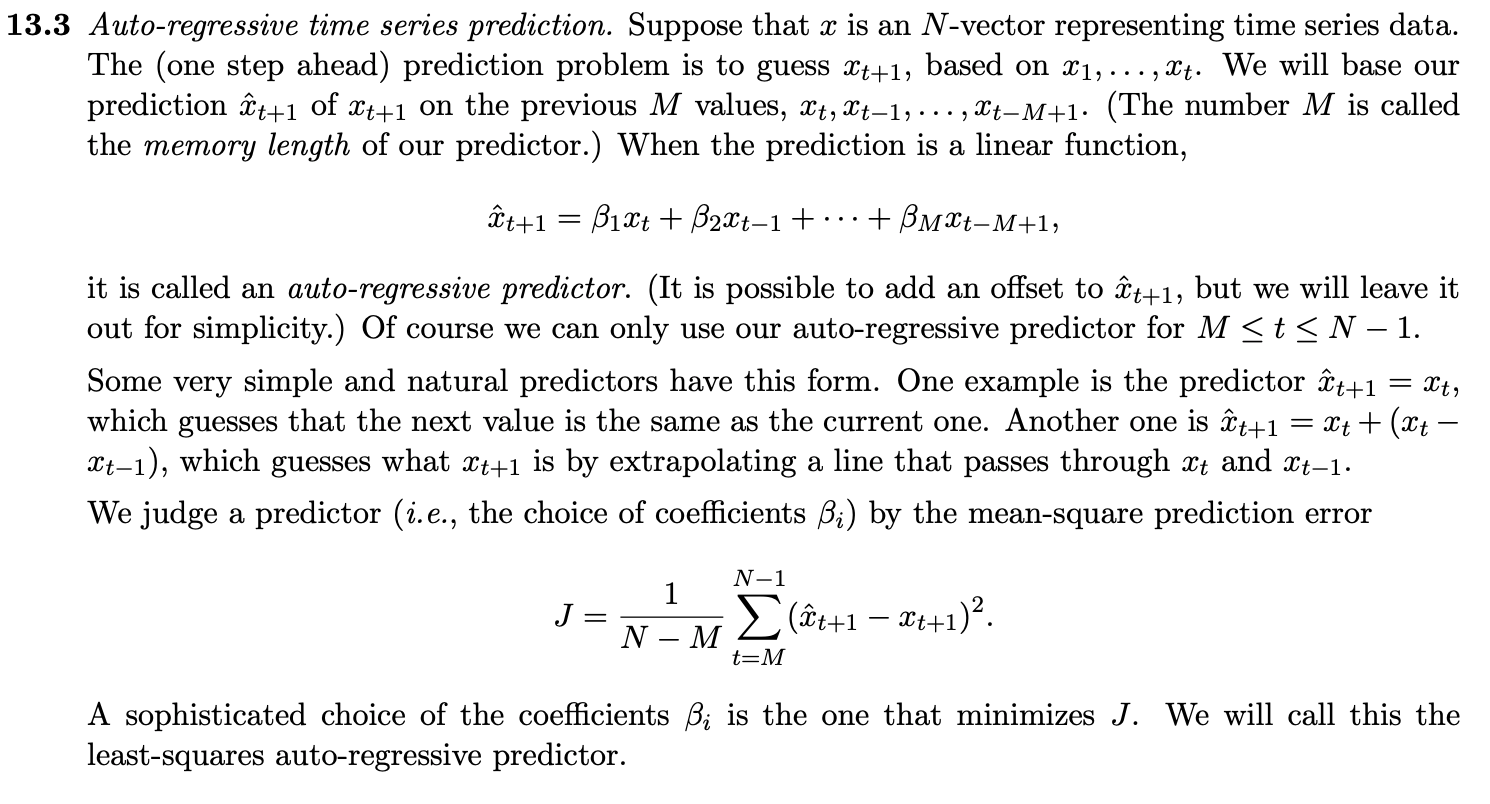

**(a)** Describe the **size** and **entries** of the matrix $A$ and the vector $b$ for which $J = \Vert A\beta - b\Vert^2 / (N-M)$.  This allows you to find the coefficients $\beta$ that minimize $J$, i.e. the auto-regressive predictor that minimizes the mean-square prediction error, simply by solving a standard least-square problem (`β = A \ b` in Julia).

**(b)** Implement an autoregressive model to predict German residential power demand with data from [this tutorial](https://vitalflux.com/autoregressive-ar-models-with-python-examples/#:~:text=Autoregressive%20models%20are%20based%20on,going%20up%20in%20the%20future.) via the code below.

* Fill in the `???` in the `autoregressive_model` to form `A, b` according to (a) for given data `x` and `M`.
* Apply it for `M=8` to find the prediction coefficients $\beta$ from "training" data consisting of the power-demand data excluding the last 100 days.
* Use the last 100 points as "test" data: compare the predictions of your fitted model by plotting the predictions for the last 100 days along with the actual data (fill in the ???).

In [6]:
# download the raw data (CSV file)
import Downloads
datafile = Downloads.download("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")

"/var/folders/q9/2vfl1wt51558xwpl4nv4wt580000gn/T/jl_sVWvDP/opsd_germany_daily.csv"

4384×5 Matrix{Any}:
 "Date"            "Consumption"     "Wind"    "Solar"     "Wind+Solar"
 "2006-01-01"  1069.18               ""        ""          ""
 "2006-01-02"  1380.52               ""        ""          ""
 "2006-01-03"  1442.53               ""        ""          ""
 "2006-01-04"  1457.22               ""        ""          ""
 "2006-01-05"  1477.13               ""        ""          ""
 "2006-01-06"  1403.43               ""        ""          ""
 "2006-01-07"  1300.29               ""        ""          ""
 "2006-01-08"  1207.98               ""        ""          ""
 "2006-01-09"  1529.32               ""        ""          ""
 "2006-01-10"  1576.91               ""        ""          ""
 "2006-01-11"  1577.18               ""        ""          ""
 "2006-01-12"  1553.28               ""        ""          ""
 ⋮                                                      
 "2017-12-20"  1559.69             90.88      8.799      99.679
 "2017-12-21"  1520.37            259.039  

summary(days) = "4383-element Vector{Int64}"
summary(consumption) = "4383-element Vector{Float64}"


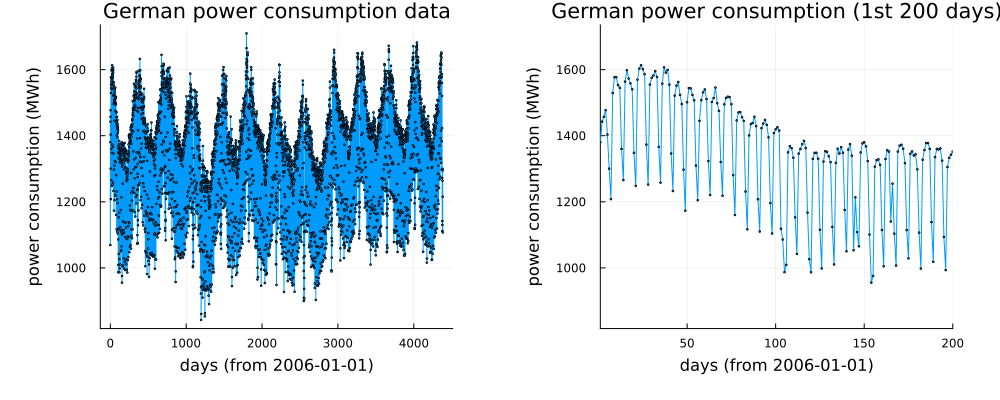

In [7]:
# extract the data and plot it:

using DelimitedFiles, Dates
data = readdlm(datafile, ',')
display(data)
dates = parse.(Date, data[2:end, 1])
days = Dates.value.(dates .- dates[1])
consumption = Float64.(data[2:end, 2])
@show summary(days)
@show summary(consumption)

using Plots
p1 = plot(days, consumption, markershape=:circle, markersize=1,
          xlabel="days (from 2006-01-01)", ylabel="power consumption (MWh)", legend=false,
          title="German power consumption data")
p2 = plot(days, consumption, markershape=:circle, markersize=1, xlim=(1,200),
          xlabel="days (from 2006-01-01)", ylabel="power consumption (MWh)", legend=false,
          title="German power consumption (1st 200 days)")
plot(p1, p2, size=(1000,400), left_margin = 10Plots.mm, bottom_margin = 10Plots.mm, right_margin = 10Plots.mm,)

### Solution:

**(a)** The main thing is to express the "prediction" vector $\hat{x} = [\hat{x}_{M+1}, \ldots \hat{x}_{N}] = A\beta$ as a matrix $A$ times the vector $\beta = [\beta_1, \ldots, \beta_M]$ of coefficients.  By inspection of the formula for $\hat{x}_{t+1}$ above, this is:
$$
\underbrace{\begin{pmatrix} \hat{x}_{M+1} \\ \hat{x}_{M+2} \\ \vdots \\ \hat{x}_{N} \end{pmatrix}}_{\hat{x}}
= \boxed{\underbrace{\begin{pmatrix} x_M & x_{M-1} & \cdots & x_{1} \\
x_{M+1} & x_{M} & \cdots & x_{2} \\
\vdots & \vdots & \vdots & \vdots \\
x_{N-1} & x_{N-2} & \cdots & x_{N-M} 
\end{pmatrix}}_{A}} \underbrace{\begin{pmatrix} \beta_{1} \\ \beta_2 \\ \vdots \\ \beta_M \end{pmatrix}}_\beta \, 
$$
where $A$ is an $\boxed{(N-M) \times M}$ matrix.  The "right-hand-side" vector $b$ is then simply the actual $x_{t}$ values to compare to the predictions $\hat{x}$: $\boxed{b = [x_{M+1}, x_{M+2}, \ldots, x_N]}$.

**(b)** We fill in the code below to construct our $A$ and $b$ from part (a):

In [8]:
# Get A and b from x and m
function autoregressive_model(x, M)
    N = length(x)
    A = similar(x, N-M, M) # allocate an (N-M)×M matrix A
    for i = 1:size(A,1) # fill in A row-by row
        t = M-1+i
        A[i,:] = x[t:-1:t-M+1] # x[t], x[t-1], …, x[t-M+1]
    end
    b = x[M+1:N] # x[M+1], x[M+2], …, x[N]
    return A, b
end

training_data = consumption[1:end-100]

# construct your A and b from M=8 and find β
M = 8
A, b = autoregressive_model(training_data, M)
β = A \ b # least-square fit

8-element Vector{Float64}:
  0.6478100500722234
 -0.08569044106766761
  0.08122941854537934
 -0.04159805684000664
  0.003054024787321972
  0.07540381091515784
  0.7940857504360923
 -0.47481957731988494

The fit coefficients $\beta$ are given above.

Now, to get the predictions for the "test data" (the predictions for the last 100 points), we can use the same `autoregressive_model` code!  Remember that the predictions are simply $A\beta$, so we just construct a new "A" matrix from the test data.

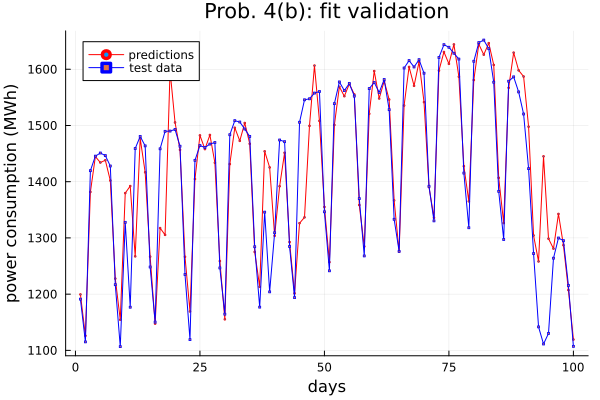

In [12]:
# test data from last 100+M points:
test_data = consumption[end-99-M:end]

# plot the predictions for the last 100 points along with test data

A_test, b_test = autoregressive_model(test_data, M)
predictions = A_test * β

plot(predictions, linecolor=:red, markershape=:circle, markersize=1, markerstrokecolor=:red, label="predictions",
     xlabel="days", ylabel="power consumption (MWh)", title="Prob. 4(b): fit validation")
plot!(test_data[end-99:end], linecolor=:blue, markershape=:rect, markerstrokecolor=:blue,  markersize=1, label="test data")

The predictions aren't too bad looking!

(Note that it is *always* a good idea to add some proper labels to the plot.  The example plotting code was a little too bare-bones.)